In [1]:
# Importing Important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import haversine_distances
from math import radians, cos, sin, asin, sqrt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing Dataset
path = "/content/drive/My Drive/Colab Notebooks/For_modeling.csv"
seoul = pd.read_csv(path, index_col=[0])
seoul.head()




/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [4]:
# Checking Data Types
seoul.dtypes

Duration        int64
Distance        int64
PLong         float64
PLatd         float64
DLong         float64
DLatd         float64
Haversine     float64
Pmonth          int64
Pday            int64
Phour           int64
Pmin            int64
PDweek          int64
Dmonth          int64
Dday            int64
Dhour           int64
Dmin            int64
DDweek          int64
Temp          float64
Precip        float64
Wind          float64
Humid         float64
Solar         float64
Snow          float64
GroundTemp    float64
Dust          float64
dtype: object

**Exploratory Data Analysis**

In [5]:
# Checking Null Values
seoul.isna().sum()

Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

There is no null value

In [6]:
seoul.shape

(9601139, 25)

In [7]:
# Data Information
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9601139 entries, 0 to 9830310
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.9 GB


In [8]:
# Data Describe
seoul.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [9]:
# No. of unique values in dataset
seoul.nunique().sort_values(ascending=False)

Haversine     238583
Distance        3385
DLatd           1508
PLatd           1504
DLong           1501
PLong           1497
GroundTemp       700
Temp             547
Solar            345
Dust             163
Duration         119
Humid             89
Wind              65
Pmin              60
Dmin              60
Precip            60
Snow              42
Dday              31
Pday              31
Dhour             24
Phour             24
Pmonth            12
Dmonth            12
PDweek             7
DDweek             7
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


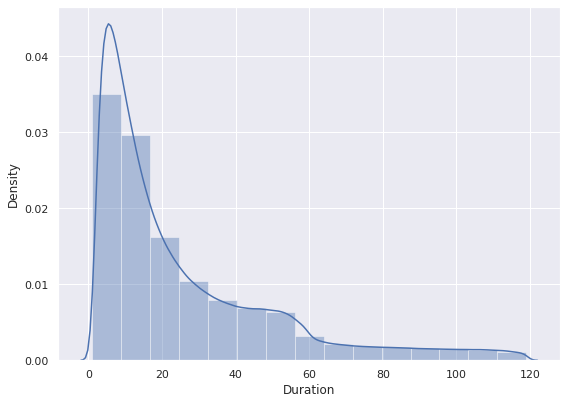

In [10]:
# Data Visualization

sns.set(rc={"figure.figsize": (9,6.5)})
sns.distplot(seoul['Duration'],bins=15)
# sns.histplot()

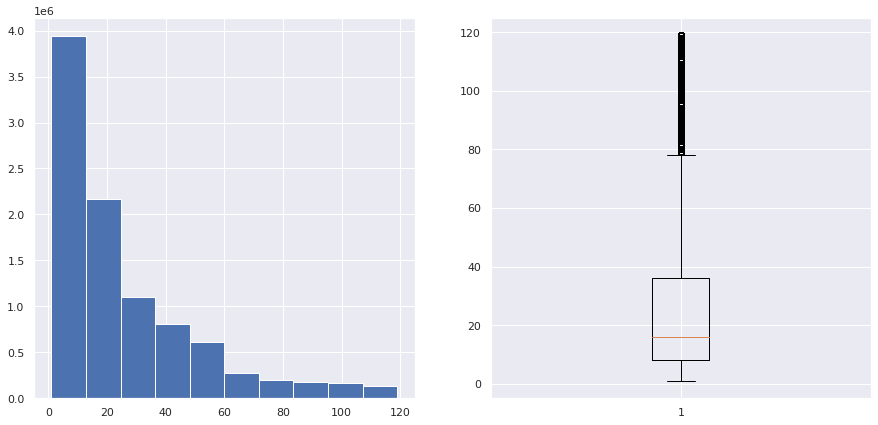

In [11]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul["Duration"]
ax1.hist(x)
ax2.boxplot(x);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


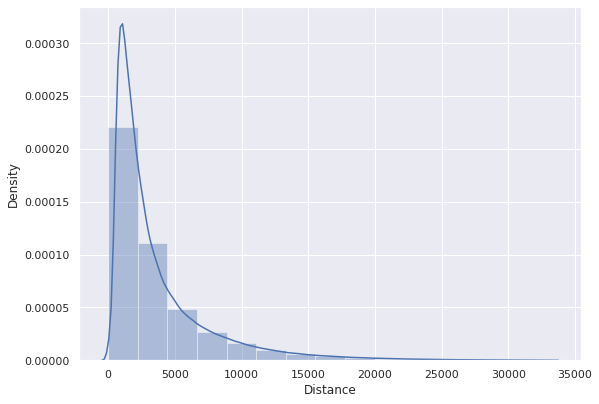

In [12]:
sns.set(rc={"figure.figsize": (9,6.5)})
sns.distplot(seoul['Distance'],bins=15)

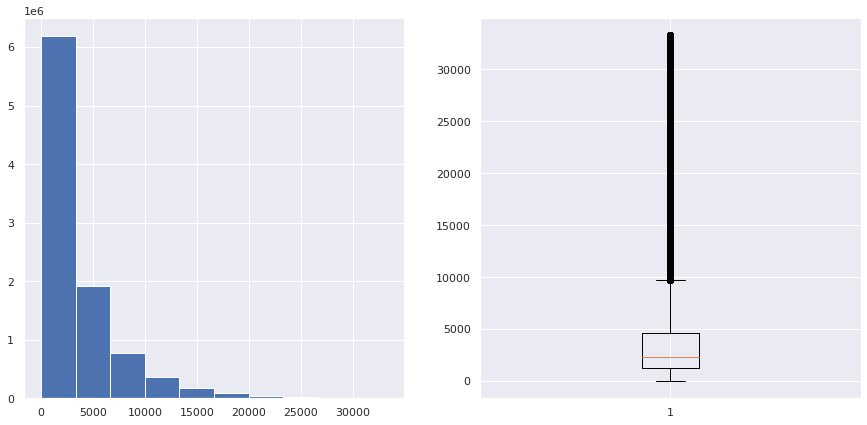

In [13]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul["Distance"]
ax1.hist(x)
ax2.boxplot(x);

In [14]:
seoul['Distance'].value_counts()

910      34587
900      33774
1100     33565
950      33549
930      33486
         ...  
29           1
28           1
26           1
13362        1
7738         1
Name: Distance, Length: 3385, dtype: int64

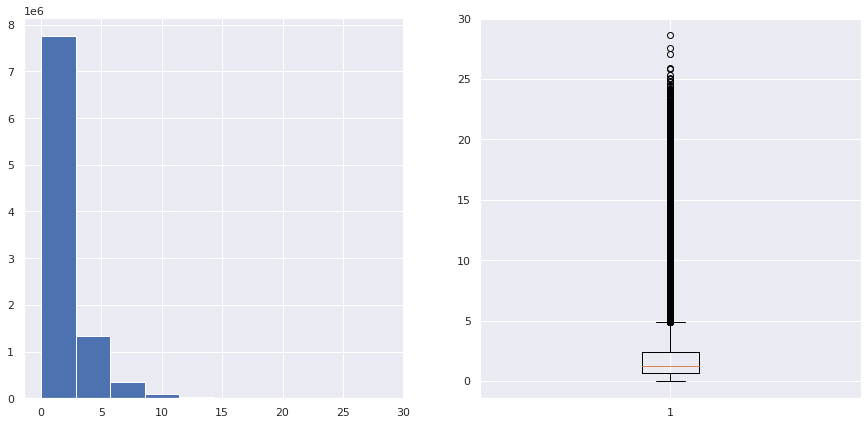

In [15]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = seoul["Haversine"]
ax1.hist(x)
ax2.boxplot(x);

In [16]:
seoul['Distance'].value_counts()

910      34587
900      33774
1100     33565
950      33549
930      33486
         ...  
29           1
28           1
26           1
13362        1
7738         1
Name: Distance, Length: 3385, dtype: int64

In [17]:
#  Checking 0.00 values
(seoul == 0.00).sum()

Duration            0
Distance            0
PLong               0
PLatd               0
DLong               0
DLatd               0
Haversine      955083
Pmonth              0
Pday                0
Phour          312614
Pmin           151097
PDweek        1368433
Dmonth              0
Dday                0
Dhour          350663
Dmin           157305
DDweek        1367274
Temp             2857
Precip        9485238
Wind            39987
Humid               0
Solar         3439939
Snow          9531693
GroundTemp      53281
Dust           237024
dtype: int64

A lot of columns have zero(0.00) value

Also, the **Latitude and Longitude columns** are titles **incorrectly**, as Latitude cannot be greater than 90°

In [18]:
print(seoul["PLatd"][1])
print(seoul["PLong"][1])
print(seoul["DLatd"][1])
print(seoul["DLong"][1])

127.00394399999999
37.506199
127.035103
37.55125


In [19]:
seoul.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [20]:
seoul[['PLatd','PLong']] = seoul[['PLong','PLatd']]
seoul[['DLatd','DLong']] = seoul[['DLong','DLatd']]
seoul.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,126.888359,37.544666,126.888359,37.544666,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,127.003944,37.506199,127.035103,37.551250,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,127.057083,37.544590,127.061096,37.537014,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,127.023560,37.571102,127.034920,37.561447,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,127.015907,37.573242,127.016403,37.565849,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


Trying to fill Haversine distance using function

In [21]:
def calc_haversine(lon1, lat1, lon2, lat2, is_deg=True):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    if is_deg:
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = (sin(dlat/2)**2) + ((cos(lat1) * cos(lat2)) * sin(dlon/2)**2)
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

d = seoul["Haversine"][1]
plat = seoul["PLatd"][1]
plon = seoul["PLong"][1]
dlat = seoul["DLatd"][1]
dlon = seoul["DLong"][1]

print(d)
calc_haversine(plon, plat, dlon, dlat)


5.713528999751687


5.7135211079002115

Finding Outliers

In [22]:
from scipy import stats

z = np.abs(stats.zscore(seoul))
print(z)

[[0.91053951 0.92592339 1.24063231 ... 0.06110792 1.81183863 0.30981168]
 [0.07199272 0.9999672  0.15919923 ... 0.06110792 1.81183863 0.30981168]
 [0.71088551 0.58724971 0.8027572  ... 0.06110792 1.81183863 0.30981168]
 ...
 [3.6815024  0.24857604 0.15919923 ... 0.06110792 2.03314384 0.68717101]
 [2.56344002 3.40101189 0.76700155 ... 0.06110792 2.0410476  0.85333479]
 [3.6016408  0.58219488 1.02035268 ... 0.06110792 2.0410476  0.85333479]]


In [23]:
threshold = 3
print(np.where(z>3))

(array([     20,      35,      35, ..., 9601137, 9601137, 9601138]), array([1, 1, 6, ..., 1, 6, 0]))


In [24]:
seoul_data = seoul[(z < 3).all(axis=1)]
seoul_data.shape

(8790348, 25)

In [25]:
seoul.shape

(9601139, 25)

**Preprocessing**

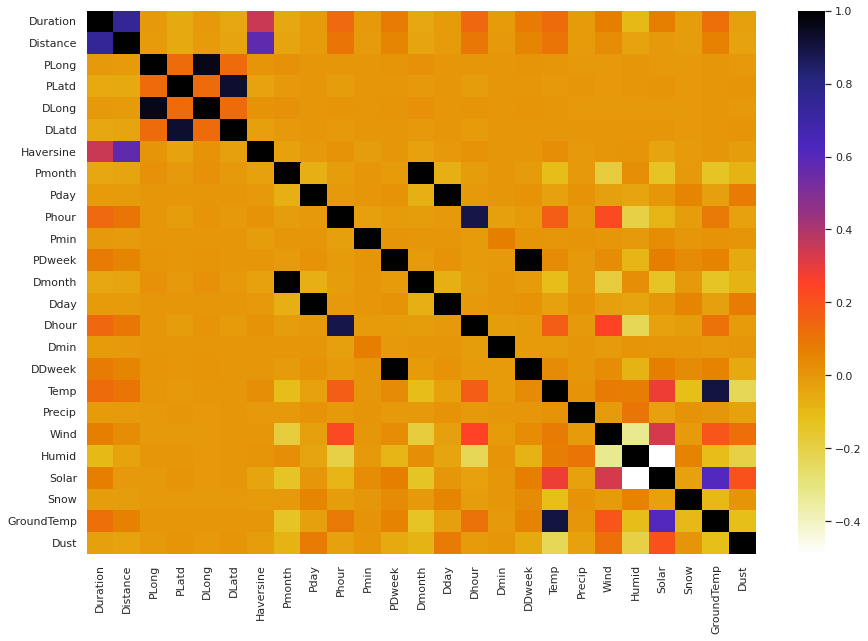

In [26]:
# correlation

sns.set()
plt.figure(figsize=(15,10))
sns.heatmap(seoul.corr(), annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

In [27]:
seoul_data.reset_index(drop=True, inplace=True)
seoul_data.tail()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
8790343,39,6080,127.066093,37.613556,127.026566,37.644737,4.913049,12,31,23,56,0,1,1,0,36,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
8790344,70,7410,126.933174,37.549767,126.933174,37.549767,0.000000,12,31,23,27,0,1,1,0,39,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
8790345,52,2270,127.073746,37.540089,127.067879,37.548222,1.041830,12,31,23,57,0,1,1,0,50,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
8790346,67,6930,127.051308,37.562607,127.051308,37.562607,0.000000,12,31,23,43,0,1,1,0,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
8790347,58,8320,127.085052,37.511982,127.105942,37.476028,4.402263,12,31,23,54,0,1,1,0,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [28]:
ids = list(np.where(seoul_data["Haversine"] == 0.00)[0])
len(ids)

812078

In [29]:
for s in ids[:10]:
    print(calc_haversine(seoul_data["PLong"][s], seoul_data["PLatd"][s], seoul_data["DLong"][s], seoul_data["DLatd"][s]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Dropping the rows where Haversine is 0.00 along with other columns selected analytically

In [30]:
seoul_data.drop(labels=["Snow", "Precip", "PLatd", "PLong", "DLatd", "DLong"], axis=1, inplace=True)
seoul_data = seoul_data.loc[seoul_data["Dust"] * seoul_data["Wind"] * seoul_data["Haversine"] * seoul_data["Solar"]!= 0.0]
seoul_data.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
seoul_data

,Duration,Distance,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Wind,Humid,Solar,GroundTemp,Dust
0,72,13620,3.951107,1,1,9,0,0,1,1,10,12,0,-4.3,0.7,39.0,0.15,-3.6,28.0
1,4,1130,0.864268,1,1,9,0,0,1,1,9,5,0,-4.3,0.7,39.0,0.15,-3.6,28.0
2,30,6850,3.787676,1,1,9,1,0,1,1,9,31,0,-4.3,0.7,39.0,0.15,-3.6,28.0
3,4,1080,0.705526,1,1,9,1,0,1,1,9,6,0,-4.3,0.7,39.0,0.15,-3.6,28.0
4,3,630,0.540025,1,1,9,1,0,1,1,9,5,0,-4.3,0.7,39.0,0.15,-3.6,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925517,77,8050,2.031104,12,31,18,48,0,12,31,20,11,0,-2.4,1.7,27.0,0.02,-1.4,49.0
4925518,81,7960,2.031104,12,31,18,49,0,12,31,20,11,0,-2.4,1.7,27.0,0.02,-1.4,49.0
4925519,73,2950,0.143801,12,31,18,59,0,12,31,20,13,0,-2.4,1.7,27.0,0.02,-1.4,49.0
4925520,87,1370,0.708871,12,31,18,46,0,12,31,20,14,0,-2.4,1.7,27.0,0.02,-1.4,49.0


Dropping Day, Month and Week variables of drop context, as the
entire circulation is within the same city, and these columns become repetitive

In [32]:
seoul_data.drop(labels=["Dday", "Dmonth", "DDweek"], axis=1, inplace=True)
seoul_data.tail()

,Duration,Distance,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dhour,Dmin,Temp,Wind,Humid,Solar,GroundTemp,Dust
4925517,77,8050,2.031104,12,31,18,48,0,20,11,-2.4,1.7,27.0,0.02,-1.4,49.0
4925518,81,7960,2.031104,12,31,18,49,0,20,11,-2.4,1.7,27.0,0.02,-1.4,49.0
4925519,73,2950,0.143801,12,31,18,59,0,20,13,-2.4,1.7,27.0,0.02,-1.4,49.0
4925520,87,1370,0.708871,12,31,18,46,0,20,14,-2.4,1.7,27.0,0.02,-1.4,49.0
4925521,84,2480,1.805493,12,31,18,53,0,20,19,-2.4,1.7,27.0,0.02,-1.4,49.0


In [33]:
skew = seoul_data.skew()
print(skew)

Duration      1.606519
Distance      1.742666
Haversine     1.620493
Pmonth       -0.214643
Pday          0.025915
Phour        -0.350199
Pmin         -0.005422
PDweek        0.064906
Dhour        -0.349981
Dmin         -0.065243
Temp         -0.650972
Wind          0.438435
Humid         0.328529
Solar         0.629649
GroundTemp    0.045606
Dust          0.932060
dtype: float64


Multivariate Analysis

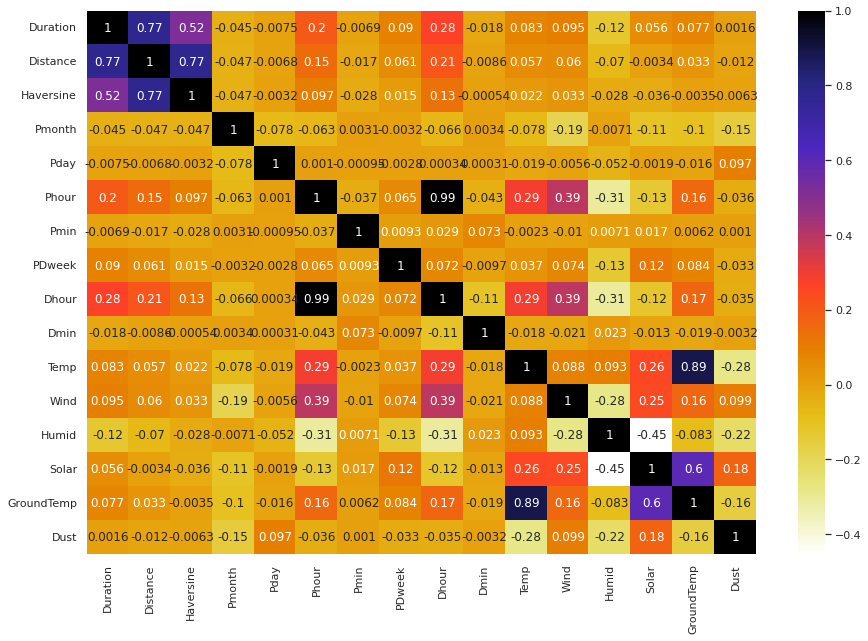

In [34]:
plt.figure(figsize=(15,10))
sns.set()
sns.heatmap(seoul_data.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

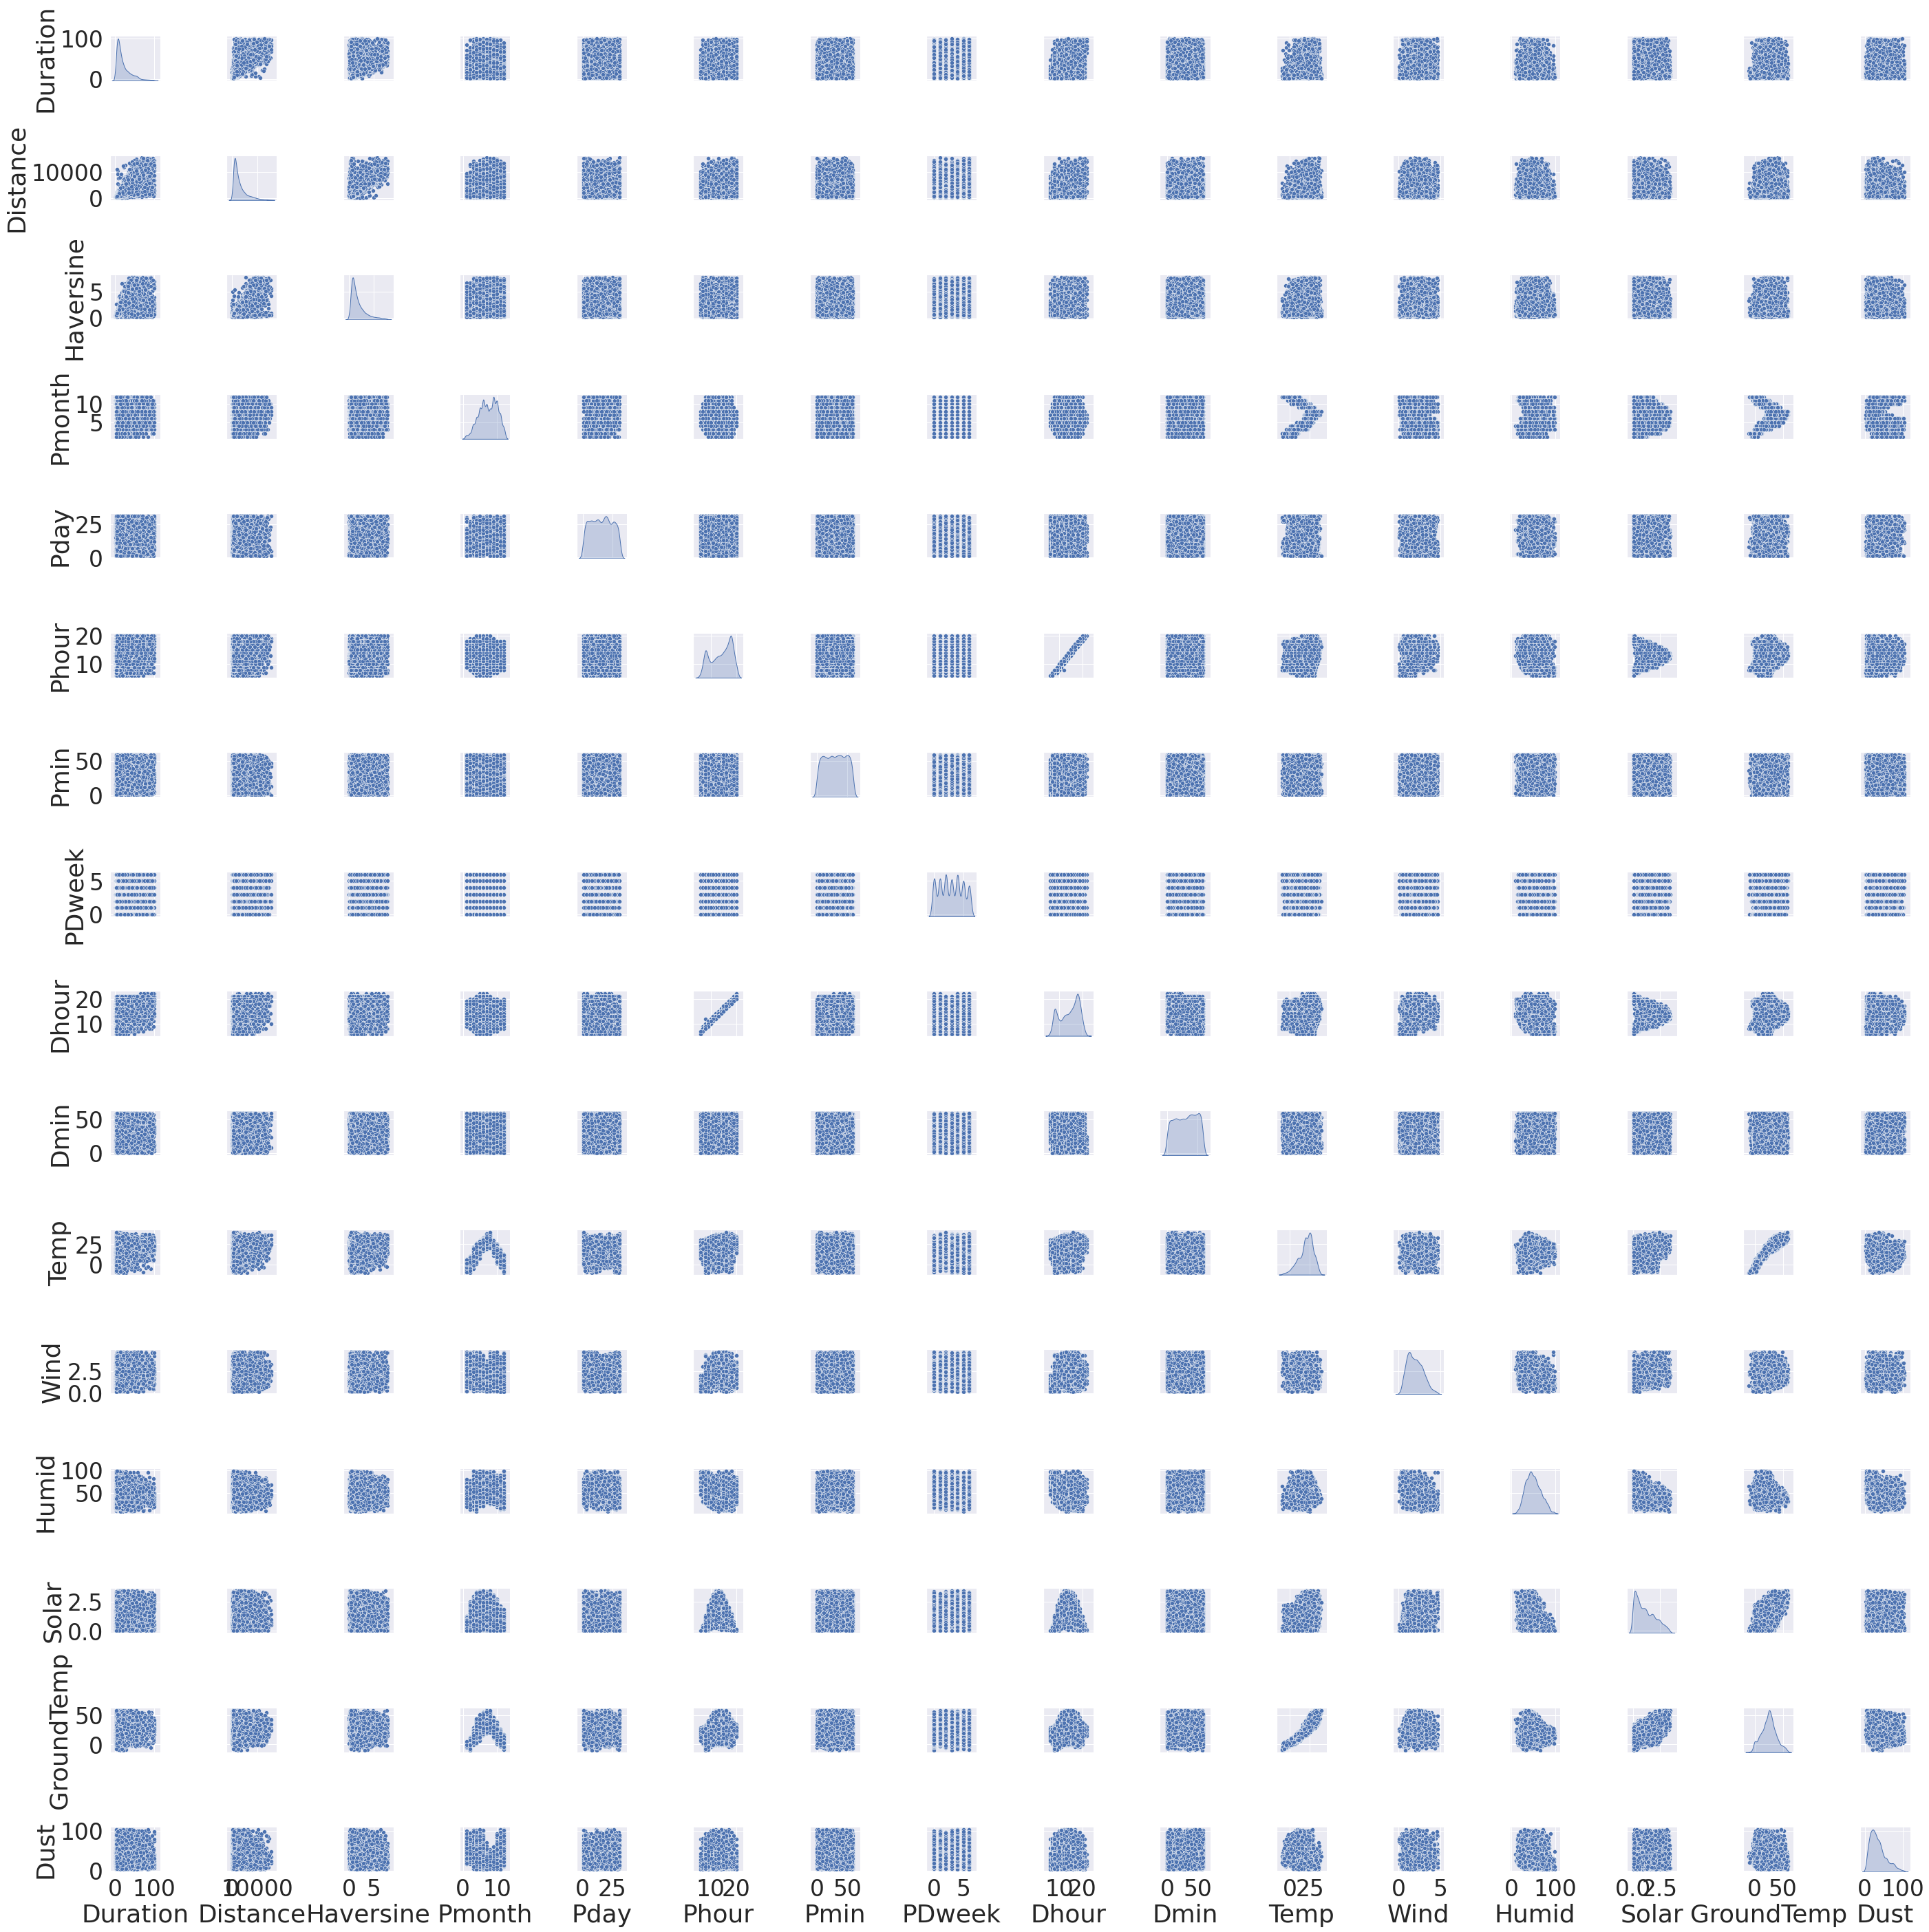

In [35]:
sampling = seoul_data.sample(n=10000)
sns.set(font_scale=3)
sns.pairplot(sampling, diag_kind='kde');

**Feature Engineering**

In [36]:
# 4925522
seoul_data_sample = seoul_data.sample(n=49255, replace=True,random_state=101)
seoul_data_sample.reset_index(drop=True,inplace=True)
seoul_data_sample

,Duration,Distance,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dhour,Dmin,Temp,Wind,Humid,Solar,GroundTemp,Dust
0,77,13260,0.958702,9,14,18,50,4,20,10,25.7,1.5,57.0,0.24,27.6,13.0
1,36,9970,5.574595,6,12,19,1,1,19,38,23.1,2.4,58.0,0.59,24.4,12.0
2,8,1840,1.586532,12,19,17,25,2,17,34,6.9,1.8,25.0,0.20,2.8,46.0
3,86,9690,6.511960,3,26,18,28,0,19,55,16.0,2.9,33.0,0.60,14.2,81.0
4,10,1420,1.158639,10,10,16,56,2,17,7,13.8,3.7,43.0,0.74,15.4,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49250,49,7150,2.573260,9,17,16,6,0,16,55,27.6,2.8,37.0,1.90,37.8,20.0
49251,4,840,0.823227,9,17,9,1,0,9,6,20.5,1.1,66.0,1.12,22.5,16.0
49252,9,1850,1.645704,12,29,17,8,5,17,18,-4.3,2.9,24.0,0.35,-0.8,32.0
49253,19,4100,2.682890,9,2,15,15,6,15,35,29.3,1.5,43.0,2.40,43.9,12.0


**splitting data for training and testing**

In [37]:
X = seoul_data_sample.drop(labels=["Duration"], axis = 1)
y = seoul_data_sample["Duration"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [39]:
# Feature selection
# use RandomForest Regression

rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)

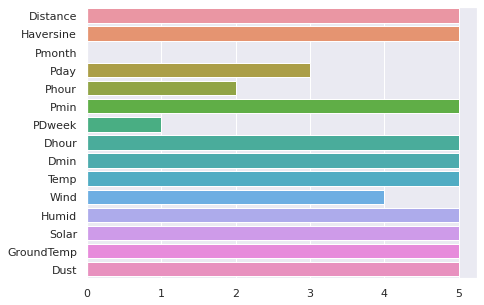

In [40]:
sns.set()
plt.figure(figsize=(7,5))
sns.barplot(y = X_train.columns, x = max(rfe.ranking_) - rfe.ranking_);

In [41]:
feature_list_rfe = [col for i,col in enumerate(X_train.columns) if rfe.support_[i]]
feature_list_rfe

['Distance',
 'Haversine',
 'Pmin',
 'Dhour',
 'Dmin',
 'Temp',
 'Humid',
 'Solar',
 'GroundTemp',
 'Dust']

Modelling

In [42]:
X_train_rfe.shape

(36941, 10)

In [43]:
X_test_rfe.shape

(12314, 10)

In [44]:
y_train.shape

(36941,)

In [45]:
y_test.shape

(12314,)

In [46]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)

rf.fit(X_train_rfe, y_train)
y_hat_test = rf.predict(X_test_rfe)
y_hat_train = rf.predict(X_train_rfe)

y_hat_train

array([27.075, 15.245,  7.82 , ..., 60.75 , 26.345, 34.185])

In [47]:
print(f'Training score : {rf.score(X_train_rfe, y_train)}')

print()
print('r2 score:', r2_score(y_test, y_hat_test))
print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('MSE:', mean_squared_error(y_test, y_hat_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hat_test)))

Training score : 0.9639076131113433

r2 score: 0.7440341083126079
MAE: 5.288679145687835
MSE: 91.69246911442261
RMSE: 9.575618471640492


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


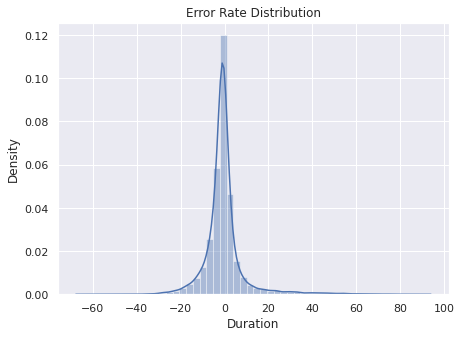

In [48]:
plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_test)
plt.title("Error Rate Distribution");

**Feature Importance**

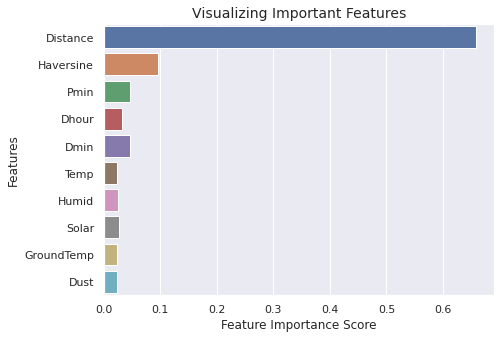

In [49]:
plt.figure(figsize=(7,5))
sns.barplot(x = rf.feature_importances_, y = feature_list_rfe)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=14);

**Hyperparametere Tuning**

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [51]:
params = {'bootstrap': [True, False],
 'max_depth': [10, 50, 100,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 1000, 2000]}

In [52]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_rfe, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 1000, 2000]},
                   random_state=42, verbose=2)

In [53]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

In [55]:
# from sklearn.externals import joblib
import joblib  
joblib.dump(rf,'For_Modelling.joblib',compress = 3)

['For_Modelling.joblib']

In [56]:
from google.colab import files
files.download('For_Modelling.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>